In [30]:
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as xgb
import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#with open ('parkinsons_detection\\parkinsons.data','r') as Data:
#    with open('parkinsons_detection\\Parkinsons.csv','w') as PS:
#        for line in Data:
#            PS.write(line)

Final_Data = pd.read_csv('Parkinsons.csv')
#print(Final_Data.shape)
#F = Final_Data.values.reshape(468,10)
#print(F.shape)

#print(Final_Data)
y = Final_Data.pop('status')
junk  = Final_Data.pop('name')
x = Final_Data

SC = StandardScaler()
X= SC.fit_transform(x)

#divding data into training and testing data in 0.8 and 0.2 proportion respectively
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state = 23)

# SVC Model

clf = SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
#print(y_pred)
YY = [y_pred, Y_test]

#The results of the SVC model prediction 

print(confusion_matrix(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

[[ 6  2]
 [ 0 31]]
0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.94      1.00      0.97        31

    accuracy                           0.95        39
   macro avg       0.97      0.88      0.91        39
weighted avg       0.95      0.95      0.95        39



In [34]:
## XGBoost Model

xg_reg = xg.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

#training xgBoost model using training data
xg_reg.fit(X_train, Y_train)

#predicting the output for test data using the trained model
y_pred1 = xg_reg.predict(X_test)


[17:53:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
#XGBoost predicted the values between 0 and 1
#converting predicted values into 0 and 1 using 0.5 as threshold

y_pred2=[]
for value in y_pred1:
  if (value>=0.5):
    y_pred2.append(1)
  else:
    y_pred2.append(0)

#y_pred2 contains the rounded predicted values

#The results of the XGBoost model prediction

print(classification_report(Y_test,y_pred2))
print(accuracy_score(Y_test,y_pred2))



              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92        39
   macro avg       0.90      0.86      0.88        39
weighted avg       0.92      0.92      0.92        39

0.9230769230769231


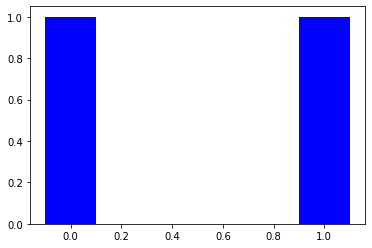

In [41]:
#plotting the y_pred results of both classifiers

plt.bar(y_pred, y_pred2, color ='blue',width = 0.2)
plt.show()
